# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -8.7187, 'lat': 70.9221},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 5.13,
  'feels_like': 3.38,
  'temp_min': 5.13,
  'temp_max': 5.13,
  'pressure': 1014,
  'humidity': 79,
  'sea_level': 1014,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 2.14, 'deg': 154, 'gust': 2.05},
 'clouds': {'all': 100},
 'dt': 1689956164,
 'sys': {'country': 'SJ', 'sunrise': 0, 'sunset': 0},
 'timezone': 7200,
 'id': 7535941,
 'name': 'Olonkinbyen',
 'cod': 200}

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | calabozo
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | howrah
Processing Record 7 of Set 1 | flying fish cove
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | ujae
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | nuuk
Processing Record 16 of Set 1 | poyarkovo
Processing Record 17 of Set 1 | askoy
Processing Record 18 of Set 1 | trenggalek
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kolonia town
Processing Record 21 of Set 1 | proletariy
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
           
# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,91,100,3.58,NZ,1689956164
1,port-aux-francais,-49.3500,70.2167,0.75,64,76,18.44,TF,1689956165
2,calabozo,8.9242,-67.4293,28.49,75,59,3.69,VE,1689956166
3,constitucion,-35.3333,-72.4167,13.09,96,100,5.30,CL,1689956167
4,howrah,22.5892,88.3103,29.00,94,40,2.06,IN,1689955955


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,91,100,3.58,NZ,1689956164
1,port-aux-francais,-49.3500,70.2167,0.75,64,76,18.44,TF,1689956165
2,calabozo,8.9242,-67.4293,28.49,75,59,3.69,VE,1689956166
3,constitucion,-35.3333,-72.4167,13.09,96,100,5.30,CL,1689956167
4,howrah,22.5892,88.3103,29.00,94,40,2.06,IN,1689955955


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

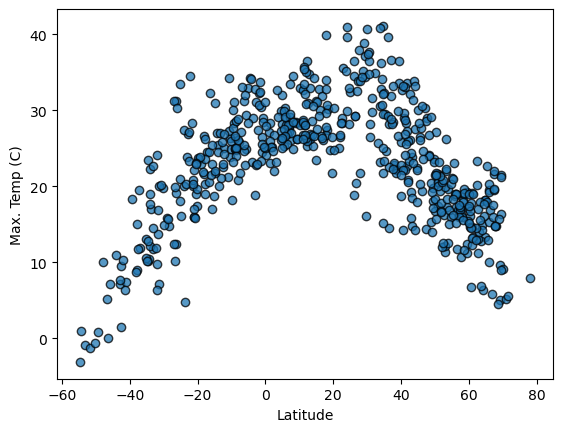

In [9]:
# Build scatter plot for latitude vs. temperature
scatter1_x = city_data_df['Lat']
scatter1_y = city_data_df['Max Temp']
plt.scatter(scatter1_x, scatter1_y, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max. Temp (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

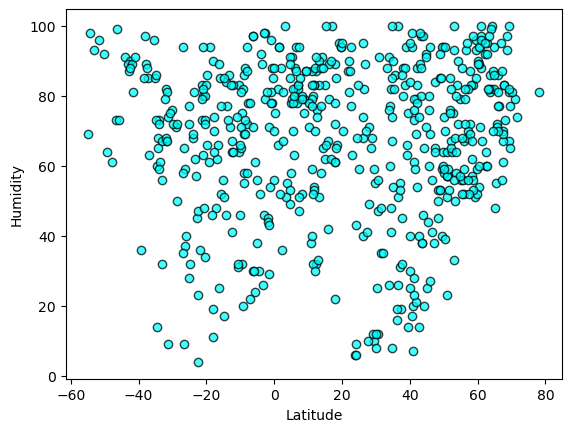

In [10]:
# Build the scatter plots for latitude vs. humidity
scatter2_y = city_data_df['Humidity']
plt.scatter(scatter1_x, scatter2_y, c='cyan', edgecolors='black', alpha=.75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

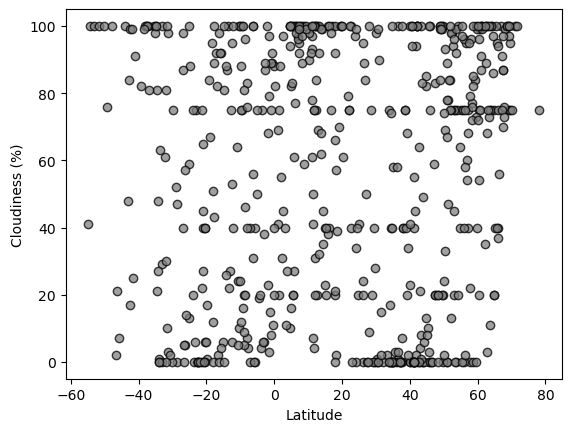

In [11]:
# Build the scatter plots for latitude vs. cloudiness
scatter3_y = city_data_df['Cloudiness']
plt.scatter(scatter1_x, scatter3_y, c='grey', edgecolors='black', alpha=.75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

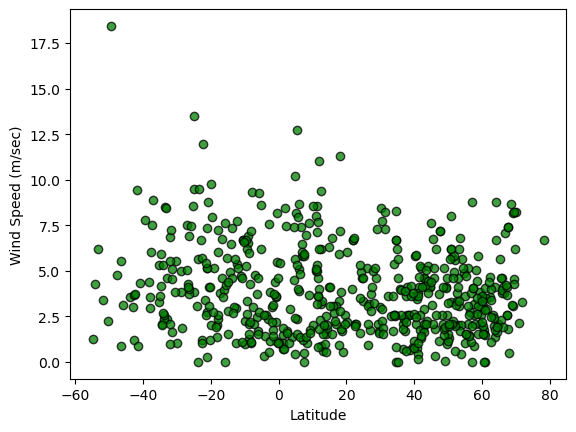

In [12]:
# Build the scatter plots for latitude vs. wind speed
scatter4_y = city_data_df['Wind Speed']
plt.scatter(scatter1_x, scatter4_y, c='green', edgecolors='black', alpha=.75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/sec)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    x_values = x
    y_values = y
    if x_values.mean() < 0:
        plotx = -30
    else:
        plotx = 10
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    # plt.legend(line_eq, loc='best')
    plt.annotate(line_eq,(plotx,15),fontsize=15,color="red")
    print(line_eq)
    print(f"The r-value is {rvalue}")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']) >= 0].set_index('City')

# Display sample data
northern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
calabozo,8.9242,-67.4293,28.49,75,59,3.69,VE,1689956166
howrah,22.5892,88.3103,29.00,94,40,2.06,IN,1689955955
sisimiut,66.9395,-53.6735,5.82,95,100,7.05,GL,1689956172
ujae,8.9322,165.7642,28.34,79,100,7.64,MH,1689956173
longyearbyen,78.2186,15.6401,7.91,81,75,6.69,SJ,1689956173


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']) <= 0].set_index('City')

# Display sample data
southern_hemi_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
waitangi,-43.9535,-176.5597,11.01,91,100,3.58,NZ,1689956164
port-aux-francais,-49.3500,70.2167,0.75,64,76,18.44,TF,1689956165
constitucion,-35.3333,-72.4167,13.09,96,100,5.30,CL,1689956167
flying fish cove,-10.4217,105.6791,23.82,83,100,6.69,CX,1689956172
grytviken,-54.2811,-36.5092,0.90,98,100,4.28,GS,1689956172


###  Temperature vs. Latitude Linear Regression Plot

y = -0.25x + 33.34
The r-value is -0.6825140304359217


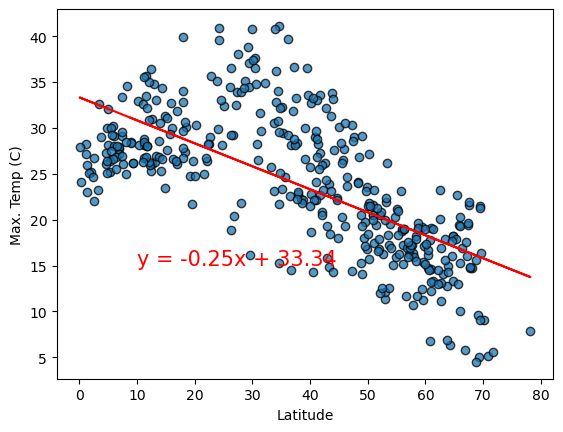

In [16]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
lin_reg(x,y)
plt.scatter(x, y, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max. Temp (C)')

plt.show()

y = 0.5x + 30.96
The r-value is 0.8201623685462558


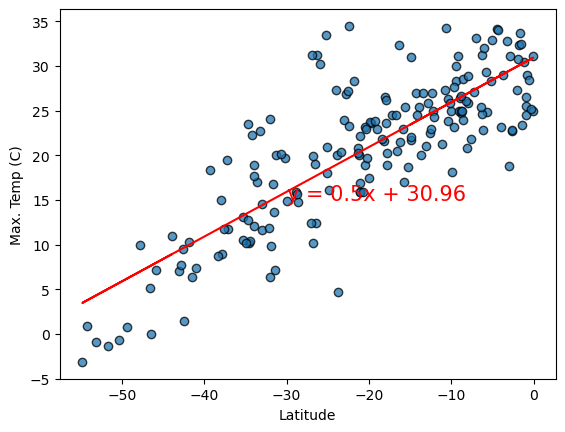

In [17]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
lin_reg(x,y)

plt.scatter(x, y, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max. Temp (C)')
plt.show()

**Discussion about the linear relationship:**  
The relationship between temperature and the latitude (horizontal lines) is a strong correlation. \
Depending on which hemisphere, it is either positive or negative. \
But, this could be stated as the closer you are to the equator (latitude = 0), the higher the temperatures are more likely to be.

### Humidity vs. Latitude Linear Regression Plot

y = 0.07x + 65.75
The r-value is 0.06159518770840646


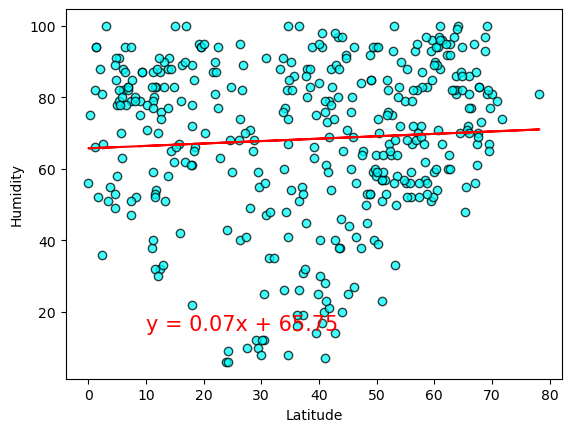

In [18]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
lin_reg(x,y)
plt.scatter(x, y, c='cyan', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

y = -0.27x + 60.38
The r-value is -0.1686884777622684


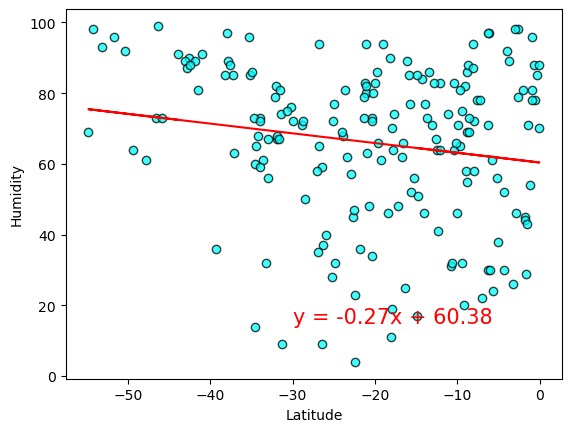

In [19]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
lin_reg(x,y)

plt.scatter(x, y, c='cyan', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** \
The correlation between humidity and latitude is quite weak in both hemispheres. There is *some* correlation because generally the extremes of both \
hemispheres tend to be more dry than close to the equator, but there are deserts on the equator as well, so that doesn't always check out. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.04x + 56.21
The r-value is 0.023870632209906616


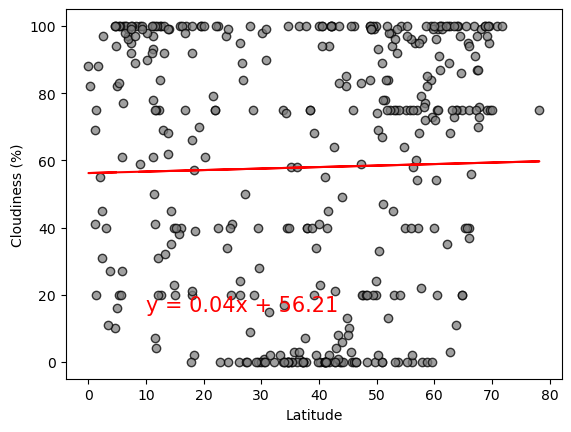

In [20]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
lin_reg(x,y)
plt.scatter(x, y, c='grey', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

y = -0.37x + 41.96
The r-value is -0.13174713144128564


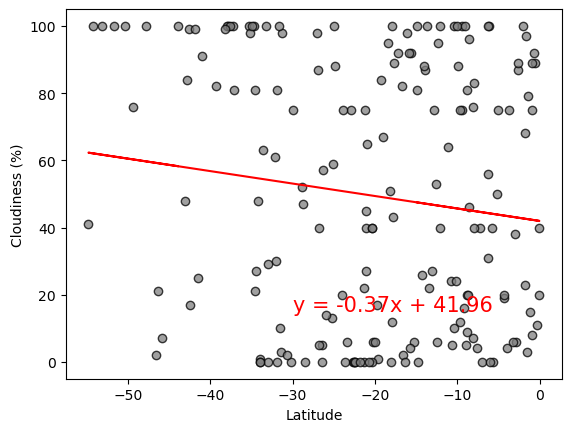

In [21]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
lin_reg(x,y)

plt.scatter(x, y, c='grey', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

**Discussion about the linear relationship:** \
The correlation between cloudiness and latitude is even weaker than with the humidity. \
It is also subject to large shifts in seasonal weather, as some locales are cloudier at different times of the year. \
I would not use this metric in any research. 

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.01x + 3.96
The r-value is -0.08667559282238582


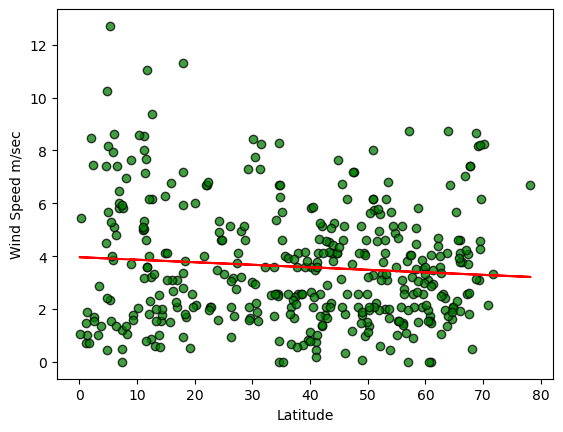

In [22]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
lin_reg(x,y)
plt.scatter(x, y, c='green', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/sec')

plt.show()

y = -0.03x + 3.79
The r-value is -0.13619604146363426


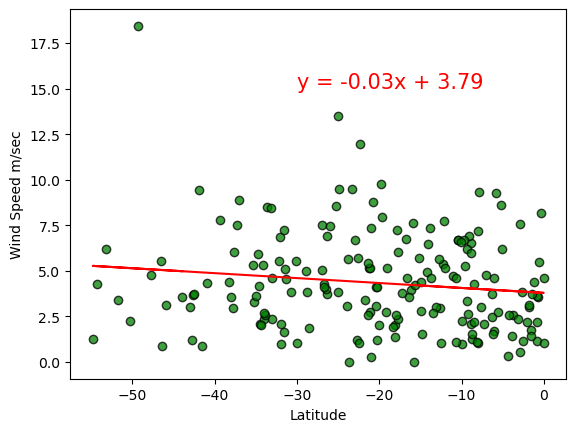

In [23]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
lin_reg(x,y)

plt.scatter(x, y, c='green', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/sec')
plt.show()

**Discussion about the linear relationship:** \
Wind speed and latitude follow the same weak trend that cloudiness follows. \
Very weak correlation between the two, and not statistically significant in my opinion. 